# Random Forest

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("glasss.csv")

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 1.Exploratory Data Analysis (EDA):

In [4]:
df.shape

(214, 10)

In [5]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There are no null values in the dataset.

Finding Statistical Summary of the Dataset:

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


RI(Refractive Index):      
Mean value is 1.518, with very low standard deviation.The distribution is approximately normal

Na(Sodium):                
Mean is 13.40.The distribution is roughly normal, but outliers are present at the higher end.

Mg(Magnesium):                   
Mean is 2.68, and minimum value is 0.Distribution is slightly left-skewed.Outliers are present.

Al(Aluminium):                   
Mean value is 1.44, and max is 3.5.Distribution is relatively uniform with a few high-end outliers.

Si(Silicon):            
Mean is 72.65,Appears to have a nearly uniform distribution.Few lower-end outliers may be present.

K(Potassium):         
Mean is 0.49, but values range up to 6.21, indicating significant high-end outliers.Slightly right-skewed distribution.

Ca(Calcium):            
Mean is 8.95, and the maximum is 16.19.Distribution appears uniform, but outliers are present at higher values.

Ba(Barium):                   
Right skewed distribution.

Fe(Iron):                         
Mean is 0.05, with most values near 0 and max around 0.51.Shows right-skewed distribution.

Type:                      
Multi-class variable ranging from 1 to 7 (excluding class 4).This is the target feature for classification.



# 2:Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Histogram:

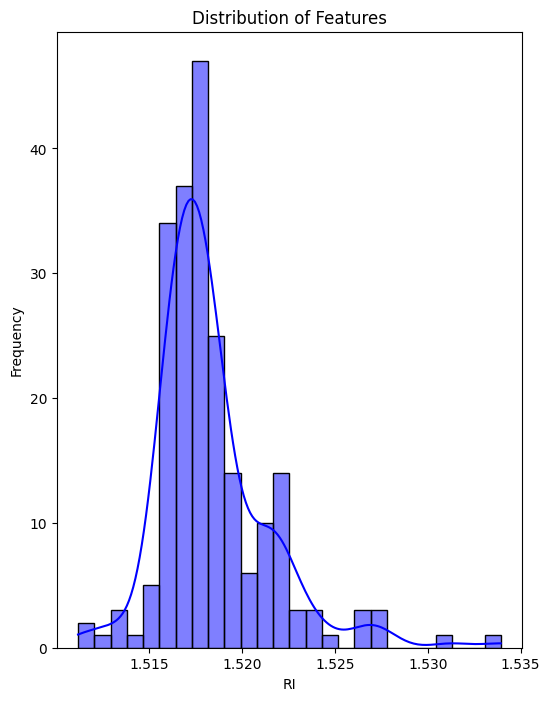

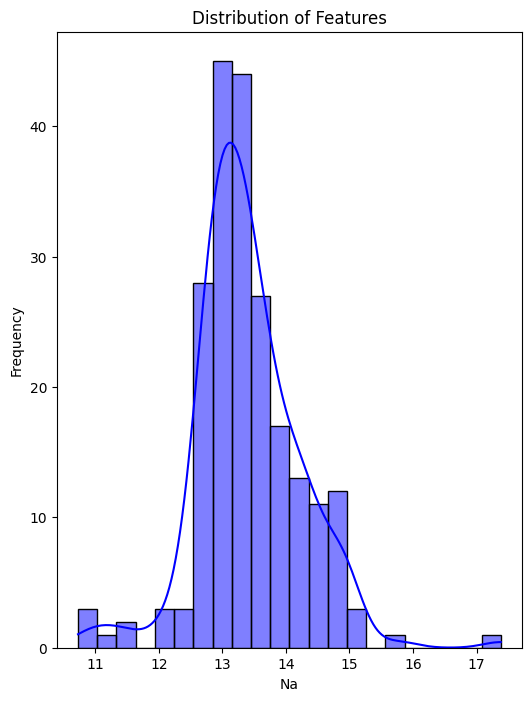

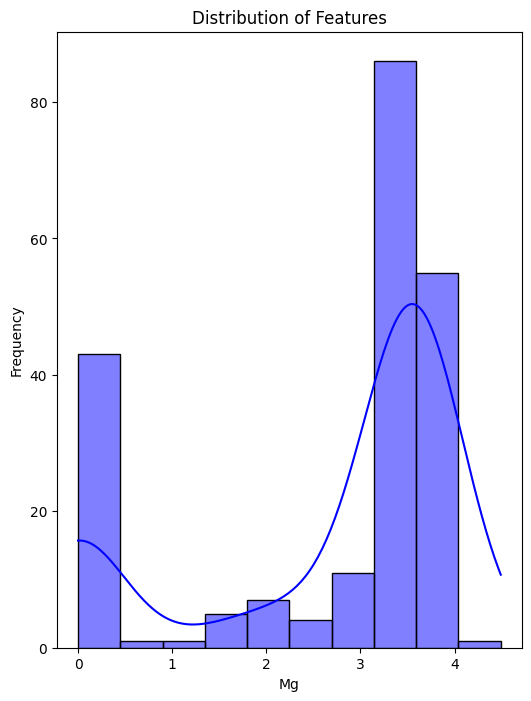

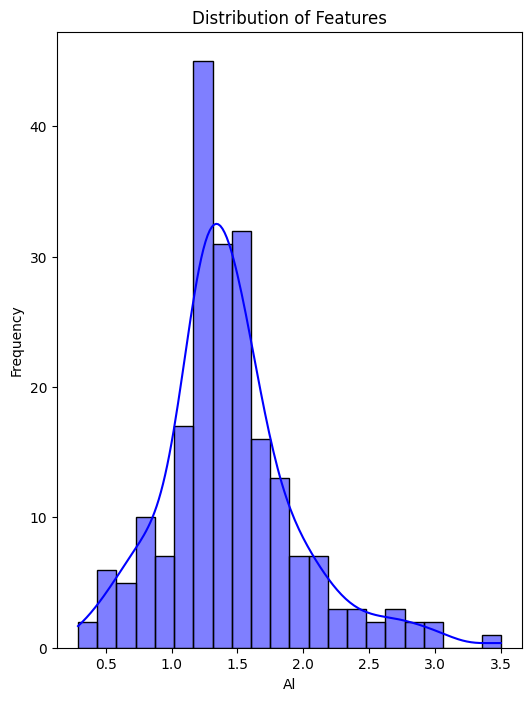

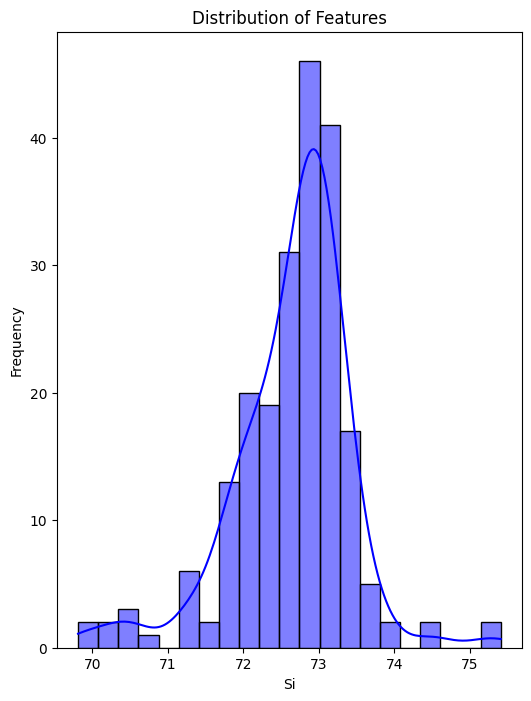

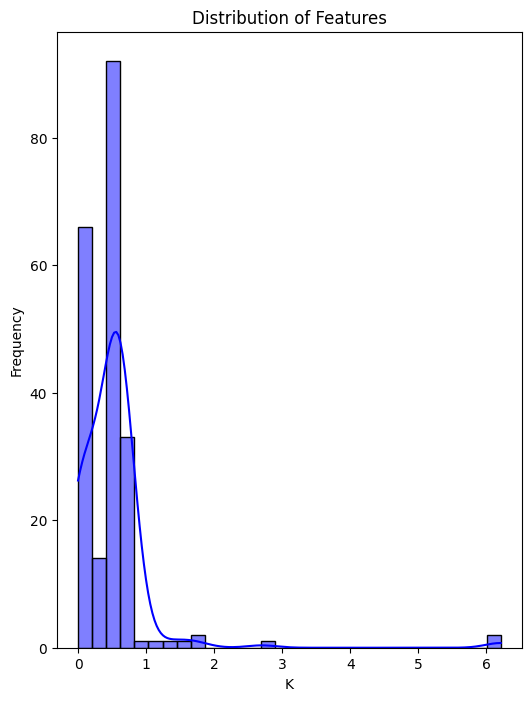

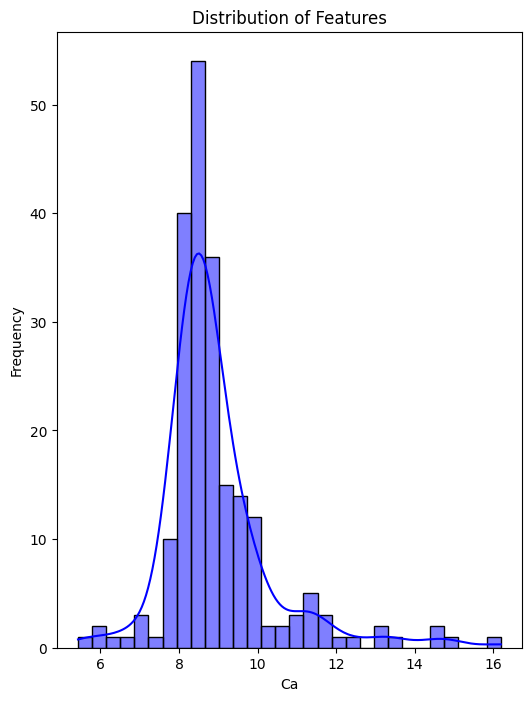

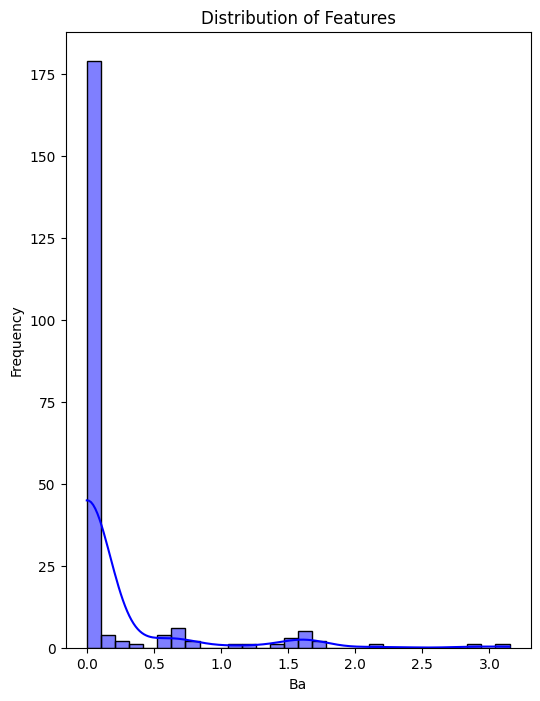

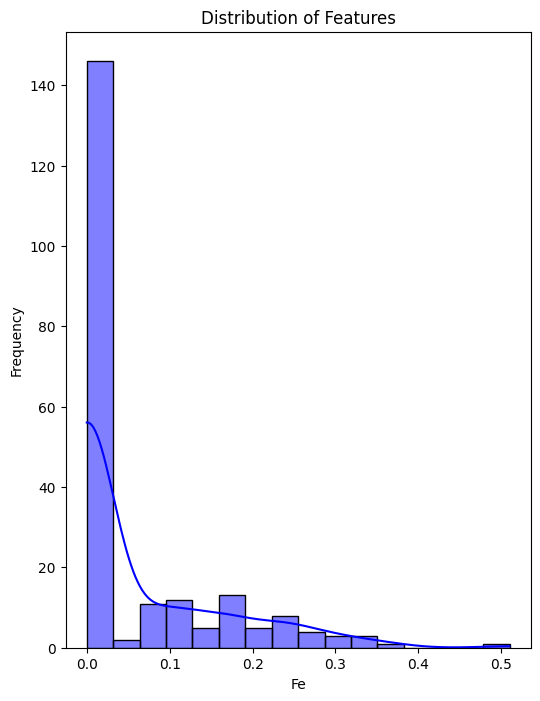

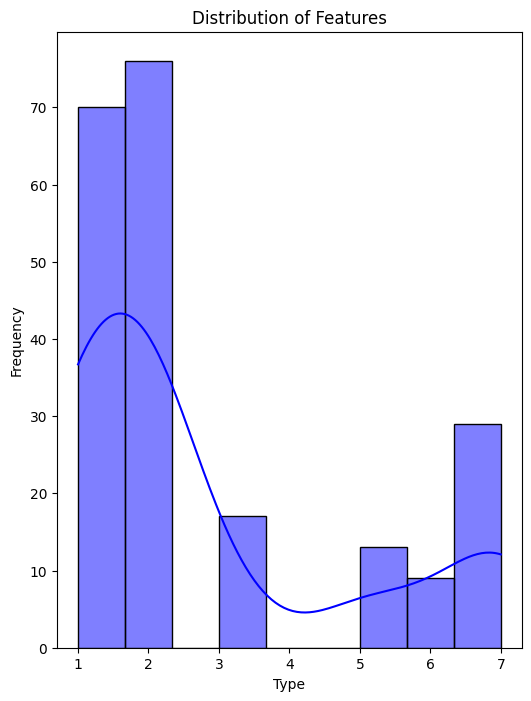

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns



for cols in df.columns:
    plt.figure(figsize=(6,8))
    sns.histplot(df[cols],color="Blue",edgecolor='black',kde=True)
    plt.xlabel(f"{cols}")
    plt.ylabel("Frequency")
    plt.title("Distribution of Features")

plt.show()

Na,Al,Si are showing uniform distribution.Ba and Fe are highly right skewed.Mg is left skewed.

BoxPlot:

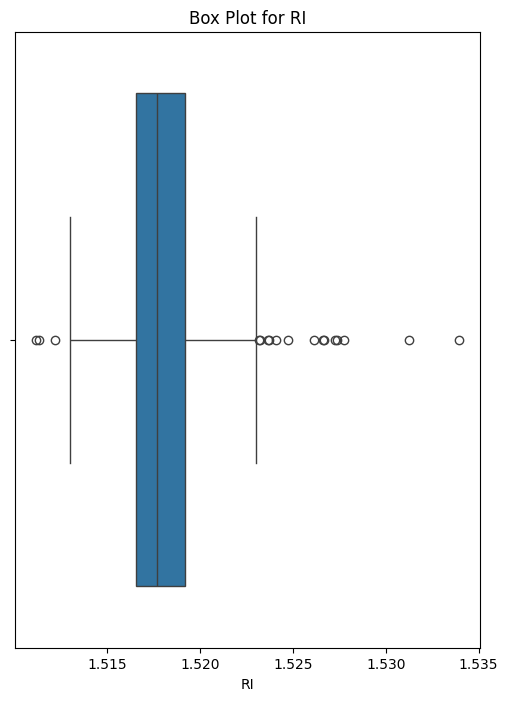

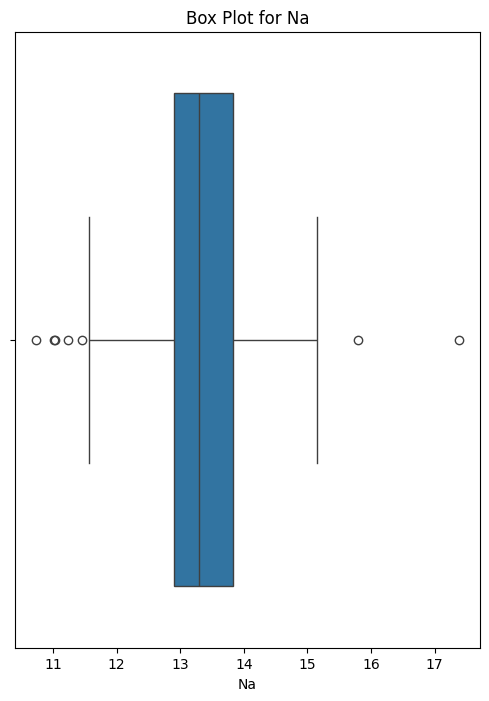

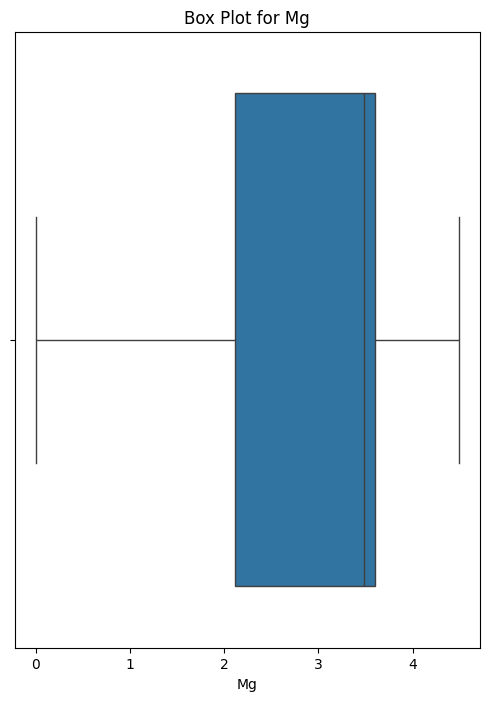

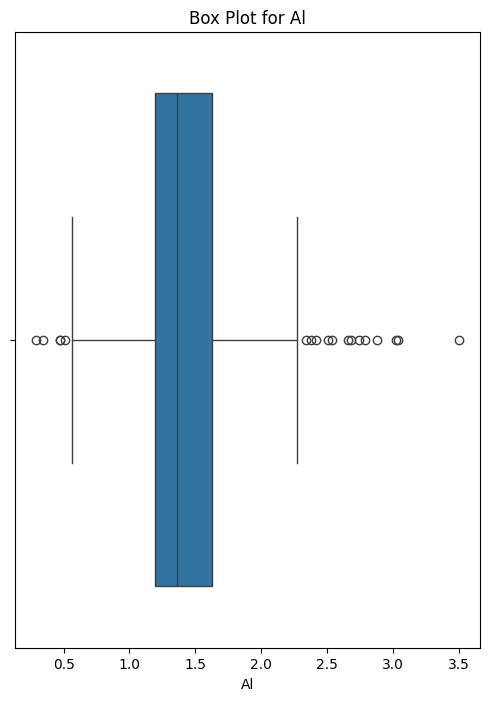

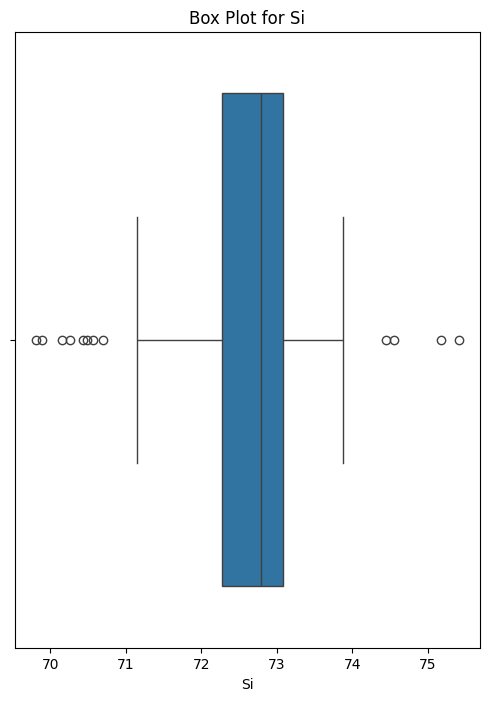

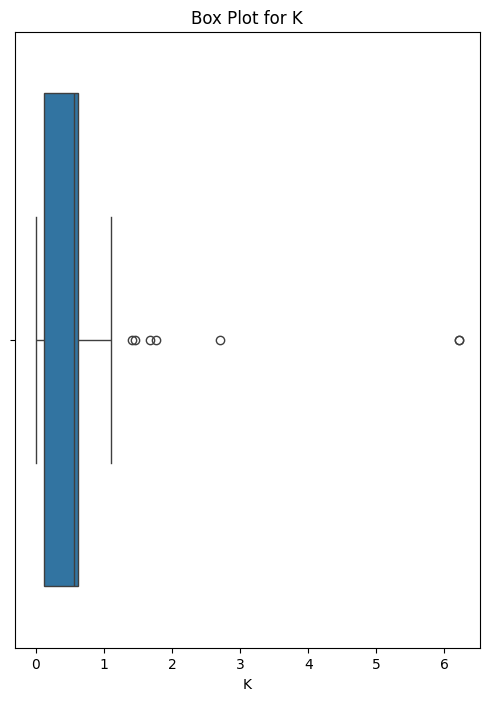

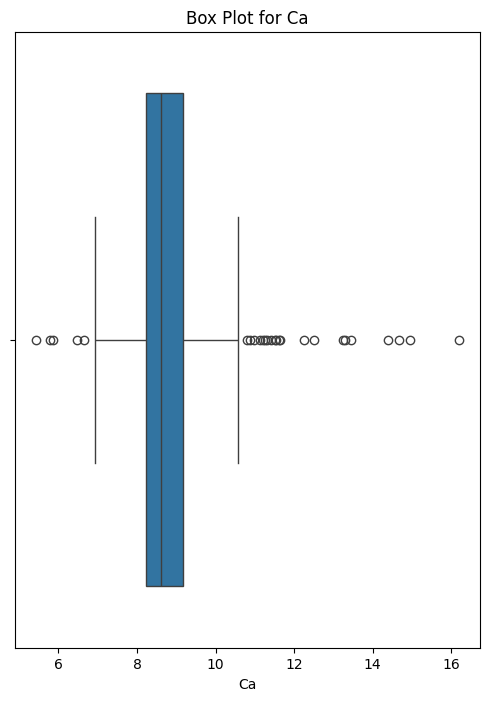

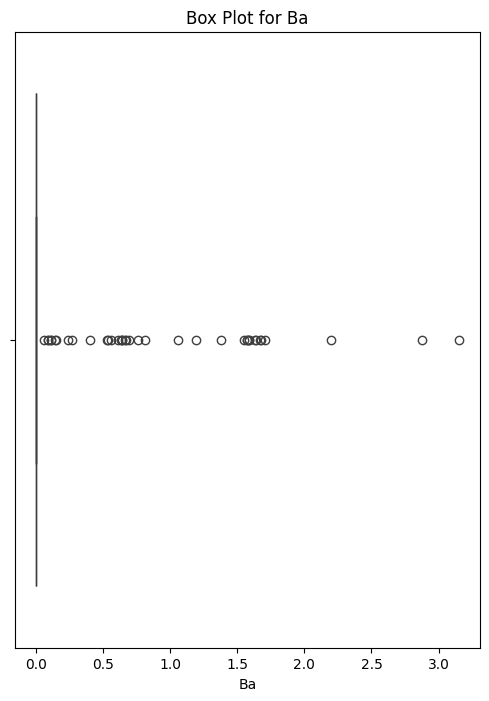

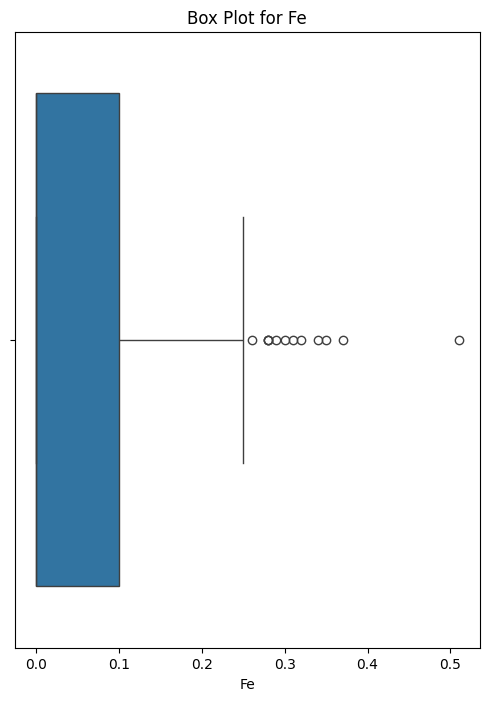

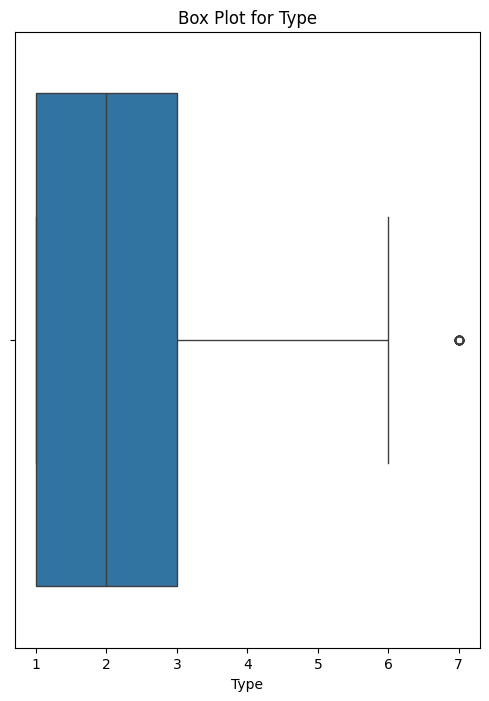

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



for cols in df.columns:
    plt.figure(figsize=(6,8))
    sns.boxplot(x=df[cols])
    plt.title(f"Box Plot for {cols}")

plt.show()

Ri has few outliers on both upper and lower end.

Na has mild  outliers on the lower end.

Mg has no visible outliers.

Aluminium has some outliers at higher end.

Si has minor outliers more on the lower end.

K has outliers mostly on the higher end.

Ca has many outliers on the upper end.

Ba large number of outliers at upper end.

Fe  has Few upper-end outliers.

Analyze any patterns or correlations observed in the data.


In [10]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


RI:           
Is strongly positively correlated with Ca(0.81) and is weakly negatively correlated with the target variable Type(-0.16).And moderately negatively correlated with Al and Si.

Na:                    
Is moderately positively correlated with the target variable Type.Weakly positively correlated with Ba.

Mg:                          
Mg is strongly negatively correlated with Type.and has weak negative and positive correlation with rest of the features.

Al:
Is moderate positively correlated with Type. Has negative correlations with Si,Ca and Fe.

Si:                       
Very weak positive correlation with Type.Negative correlation with most other features

K:                 
Has weak negative correlation with Ca,Ba,Fe and Type.

Ca:                 
Has weak negative correlation with Ba.Weak positive with Fe and very weak positive with Type.

Ba:                   
Has moderate positive correlation with Type and negative with Fe.

Fe:
Has  a weak negative correlation with Type.

The most poitively correlated features are RI and Ca.

The most negatively correlated features are Mg and Type.

# 3:Data Preprocessing

1.Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.


In [11]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

No missing values are present in the dataset.

2.If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

In [12]:
df.select_dtypes("object").columns

Index([], dtype='object')

No categorical columns are present in the dataset.

3.Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [13]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
scaled_data=ss.fit_transform(df.drop('Type', axis=1))

# 4:Random Forest Model Implementation

1.Divide the data into train and test split.

In [14]:
x = pd.DataFrame(scaled_data, columns=df.drop('Type', axis=1).columns)

In [15]:
y=df['Type']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
random_model=RandomForestClassifier()

Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [20]:
random_model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [21]:
y_pred=random_model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [23]:
print("Accracy Score:",accuracy_score(y_test,y_pred))

Accracy Score: 0.8837209302325582


In [24]:
print("Precision Score:",precision_score(y_test,y_pred,average="weighted"))

Precision Score: 0.8973791066814322


In [25]:
print("Recall Score:",recall_score(y_test,y_pred,average="weighted"))

Recall Score: 0.8837209302325582


In [26]:
print("F1 Score:",f1_score(y_test,y_pred,average="weighted"))

F1 Score: 0.8810264427774687


In [27]:
print("Classification report:")
print(classification_report(y_test,y_pred))

Classification report:
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.92      0.79      0.85        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.88        43
   macro avg       0.93      0.87      0.89        43
weighted avg       0.90      0.88      0.88        43



The model has an average of 0.86 which means it correctly predicted the glass type for 86% of the test samples.

Class 1 has 100% recall, meaning the model caught all true instances of class 1.

Class 3 & 5 have lower recall, so the model might be missing some of these — potentially due to fewer samples.

Class 6 is perfectly predicted.



# 5:Bagging and Boosting Methods

Apply the Bagging and Boosting methods and compare the results.


In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [30]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

In [31]:
ada_model.fit(x_train, y_train)


,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",100
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [32]:
y_pred_ada = ada_model.predict(x_test)

In [33]:
print("Classification Report - AdaBoost:")
print(classification_report(y_test, y_pred_ada))


Classification Report - AdaBoost:
              precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       0.59      0.71      0.65        14
           3       0.00      0.00      0.00         3
           5       0.33      0.25      0.29         4
           6       0.50      0.67      0.57         3
           7       1.00      0.75      0.86         8

    accuracy                           0.63        43
   macro avg       0.51      0.52      0.51        43
weighted avg       0.61      0.63      0.61        43



In [34]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [35]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [36]:
gb_model.fit(x_train, y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [37]:
y_pred_gb = gb_model.predict(x_test)

In [38]:
print("Classification Report - Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.92      0.79      0.85        14
           3       0.75      1.00      0.86         3
           5       1.00      0.75      0.86         4
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.89      0.81      0.81        43
weighted avg       0.88      0.86      0.85        43



Implemented Random Forest first which is a Bagging Approach and gave an accuracy of 86% which emans it showed high performnace on the dataset.

Then Implemented AdaBoost which is a Boosting Approach and gave an accuracy of 49% indicating it performed verly porrly on the dataset.

Then implemented Gradient Boosting which is again a Boosting Approach gave same accuracy as Random Forest that is 86% which shows its ability to handle patterns effectively.

Both random Forest and Gradient Boosting gave high accuracy which makes them suitable for this dataset.